# Overfitting and Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

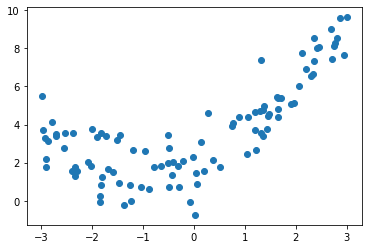

In [3]:
plt.scatter(x, y)
plt.show()

### Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

In [5]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

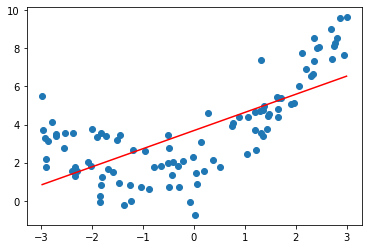

In [6]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [8]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [9]:
y2_predict = poly2_reg.predict(X)

In [10]:
mean_squared_error(y, y2_predict)

1.0987392142417856

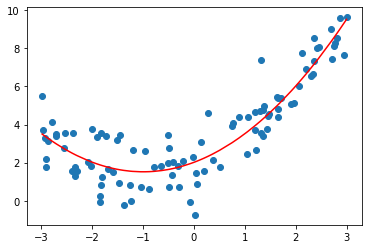

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [12]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [13]:
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764202

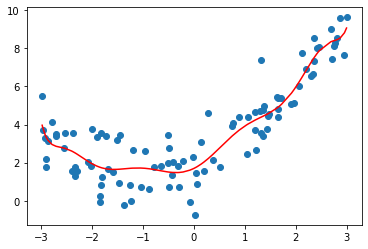

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [15]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6870911922673567

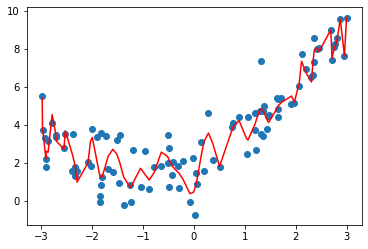

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [17]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

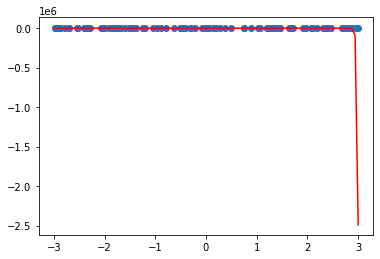

In [18]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')

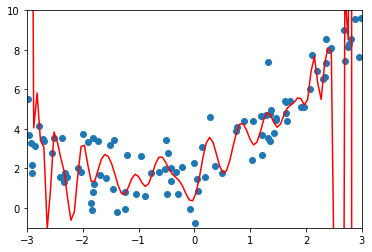

In [19]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

## Why to use train_test_split

In [20]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [24]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [25]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150697

In [26]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780347.739939

## Learning curve

In [27]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2. + np.random.normal(0, 1, size=100)

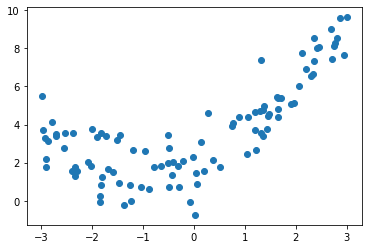

In [28]:
plt.scatter(x, y)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

# random_state=10：随机种子；
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [30]:
X_train.shape

(75, 1)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []

for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

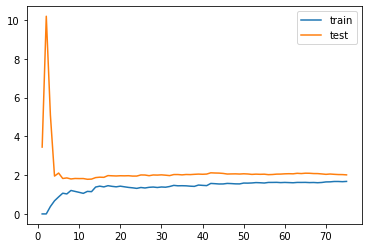

In [32]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

In [33]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(test_score), label="test")
    
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

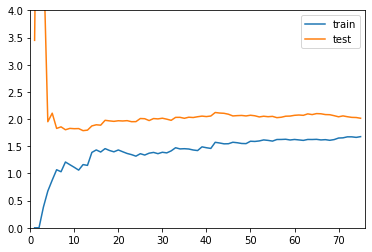

In [34]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

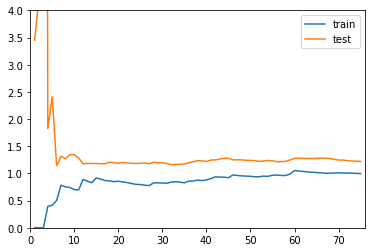

In [36]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

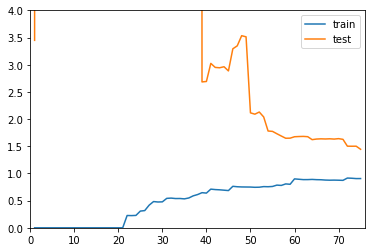

In [37]:
plot_learning_curve(PolynomialRegression(degree=20), X_train, X_test, y_train, y_test)